In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path

## Load and explore NCEI dataset 2016-2022

In [54]:
# Define paths to the storm events CSV files
data_dir = Path('NCEI_datasets/storm_events')
files = [
    data_dir / 'StormEvents_details-ftp_v1.0_d2016_c20250818.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2017_c20250520.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2018_c20250520.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2019_c20250520.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2020_c20251118.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2021_c20250520.csv',
    data_dir / 'StormEvents_details-ftp_v1.0_d2022_c20250721.csv',
]

# Load datasets
print("Loading datasets...")
df_list = []
for file in files:
    print(f"  Loading {file.name}...")
    df = pd.read_csv(file)
    print(f"    Shape: {df.shape}")
    df_list.append(df)

# Concatenate the datasets
df = pd.concat(df_list, ignore_index=True)
print(f"\nCombined dataset shape: {df.shape}")

Loading datasets...
  Loading StormEvents_details-ftp_v1.0_d2016_c20250818.csv...
    Shape: (56005, 51)
  Loading StormEvents_details-ftp_v1.0_d2017_c20250520.csv...
    Shape: (57029, 51)
  Loading StormEvents_details-ftp_v1.0_d2018_c20250520.csv...
    Shape: (62697, 51)
  Loading StormEvents_details-ftp_v1.0_d2019_c20250520.csv...
    Shape: (67861, 51)
  Loading StormEvents_details-ftp_v1.0_d2020_c20251118.csv...
    Shape: (61278, 51)
  Loading StormEvents_details-ftp_v1.0_d2021_c20250520.csv...
    Shape: (61389, 51)
  Loading StormEvents_details-ftp_v1.0_d2022_c20250721.csv...
    Shape: (69887, 51)

Combined dataset shape: (436146, 51)


In [55]:
df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [56]:
useful_column = [
    'BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 
    'END_YEARMONTH', 'END_DAY', 'END_TIME',
    'EPISODE_ID',
    'EVENT_ID',
    'STATE_FIPS',
    'YEAR',
    'MONTH_NAME',
    'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
    'WFO',
    'CZ_TIMEZONE',
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 
    'DEATHS_DIRECT', 'DEATHS_INDIRECT',  
    'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
    'SOURCE',
    'MAGNITUDE',
    'MAGNITUDE_TYPE',
    'FLOOD_CAUSE', 
    'CATEGORY', 
    'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 
    'BEGIN_RANGE', 'BEGIN_AZIMUTH',
    'END_RANGE', 'END_AZIMUTH',
    'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'
    

]

df1 = df.drop(columns=useful_column, axis=0)
df1.columns

Index(['STATE', 'EVENT_TYPE', 'BEGIN_DATE_TIME', 'END_DATE_TIME',
       'BEGIN_LOCATION', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON'],
      dtype='object')

In [57]:
df1.head()

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,SOUTH CAROLINA,Heavy Rain,15-JUL-16 17:15:00,15-JUL-16 17:15:00,BOYD HILL,BOYD HILL,34.94,-81.03,34.94,-81.03
1,SOUTH CAROLINA,Thunderstorm Wind,15-JUL-16 17:25:00,15-JUL-16 17:25:00,FT MILL,FT MILL,35.01,-80.93,35.01,-80.93
2,NORTH CAROLINA,Thunderstorm Wind,16-JUL-16 12:46:00,16-JUL-16 12:46:00,OLD FT,OLD FT,35.64,-82.14,35.64,-82.14
3,TENNESSEE,Thunderstorm Wind,08-JUL-16 17:55:00,08-JUL-16 17:55:00,JENA,JENA,35.65,-84.18,35.65,-84.18
4,TENNESSEE,Thunderstorm Wind,08-JUL-16 18:10:00,08-JUL-16 18:10:00,PITNER,PITNER,35.87,-83.77,35.87,-83.77


In [58]:
df1['EVENT_TYPE'].unique()

array(['Heavy Rain', 'Thunderstorm Wind', 'Winter Storm',
       'Marine Thunderstorm Wind', 'Heat', 'Excessive Heat',
       'Flash Flood', 'High Wind', 'Flood', 'Marine High Wind', 'Drought',
       'Strong Wind', 'Hail', 'Winter Weather', 'Tornado', 'Lightning',
       'Extreme Cold/Wind Chill', 'Wildfire', 'Heavy Snow',
       'Coastal Flood', 'Lake-Effect Snow', 'Dense Fog', 'Ice Storm',
       'Cold/Wind Chill', 'Blizzard', 'Waterspout', 'Frost/Freeze',
       'Funnel Cloud', 'Avalanche', 'High Surf', 'Debris Flow',
       'Astronomical Low Tide', 'Marine Dense Fog', 'Tropical Storm',
       'Rip Current', 'Hurricane (Typhoon)', 'Dust Storm', 'Marine Hail',
       'Dust Devil', 'Storm Surge/Tide', 'Freezing Fog',
       'Marine Strong Wind', 'Marine Tropical Storm', 'Sneakerwave',
       'Marine Tropical Depression', 'Marine Hurricane/Typhoon', 'Seiche',
       'Lakeshore Flood', 'Tropical Depression', 'Sleet', 'Dense Smoke',
       'Volcanic Ashfall', 'Tsunami'], dtype=object)

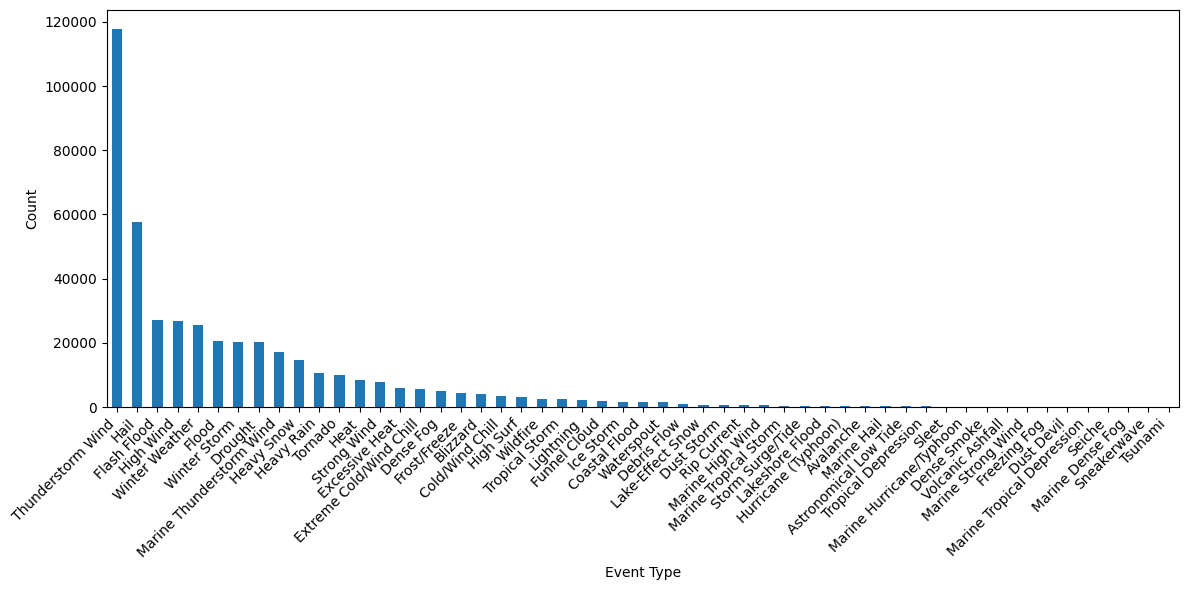

In [59]:
df1['EVENT_TYPE'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
df1['EVENT_TYPE'].value_counts()

EVENT_TYPE
Thunderstorm Wind             117814
Hail                           57789
Flash Flood                    27173
High Wind                      26880
Winter Weather                 25686
Flood                          20644
Winter Storm                   20125
Drought                        20115
Marine Thunderstorm Wind       17003
Heavy Snow                     14744
Heavy Rain                     10488
Tornado                         9899
Heat                            8435
Strong Wind                     7735
Excessive Heat                  5844
Extreme Cold/Wind Chill         5729
Dense Fog                       4930
Frost/Freeze                    4487
Blizzard                        4135
Cold/Wind Chill                 3385
High Surf                       3123
Wildfire                        2505
Tropical Storm                  2356
Lightning                       2261
Funnel Cloud                    1892
Ice Storm                       1607
Coastal Flood              

In [61]:
df1[df1['BEGIN_LOCATION'] != df1['END_LOCATION']]

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
6,WYOMING,Winter Storm,04-DEC-16 03:00:00,05-DEC-16 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
7,WYOMING,Winter Storm,04-DEC-16 04:00:00,05-DEC-16 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8,WYOMING,Winter Storm,04-DEC-16 04:00:00,05-DEC-16 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
14,CONNECTICUT,Heat,13-AUG-16 10:00:00,13-AUG-16 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
15,CONNECTICUT,Excessive Heat,13-AUG-16 10:00:00,13-AUG-16 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
436137,LOUISIANA,Drought,01-NOV-22 00:00:00,25-NOV-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
436138,LOUISIANA,Drought,01-NOV-22 00:00:00,25-NOV-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
436139,LOUISIANA,Tornado,26-NOV-22 15:34:00,26-NOV-22 15:41:00,TALISHEEK,BUSH,30.5557,-89.8584,30.5982,-89.8509
436140,MISSISSIPPI,Tornado,30-NOV-22 00:49:00,30-NOV-22 00:59:00,TERRYS CREEK,MAGNOLIA,31.1116,-90.5480,31.1170,-90.4469


In [62]:
df2 = df1[df1['EVENT_TYPE'] == 'Flood'].copy()
df2.shape

(20644, 10)

In [63]:
df2.head()

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
40,MARYLAND,Flood,25-FEB-16 11:57:00,25-FEB-16 18:41:00,UPPER MARLBORO,UPPER MARLBORO,38.8141,-76.7496,38.8129,-76.7505
41,MARYLAND,Flood,24-FEB-16 20:16:00,24-FEB-16 22:21:00,WHITE MARSH,WHITE MARSH,39.3763,-76.4585,39.3744,-76.4553
43,MARYLAND,Flood,24-FEB-16 23:36:00,25-FEB-16 07:01:00,GREAT MILLS,GREAT MILLS,38.2307,-76.4926,38.2377,-76.4974
44,MARYLAND,Flood,24-FEB-16 21:37:00,25-FEB-16 00:23:00,SAVAGE,SAVAGE,39.1225,-76.8098,39.1363,-76.8140
112,VIRGINIA,Flood,24-FEB-16 23:04:00,25-FEB-16 00:30:00,STONY PT,GILBERT,38.1339,-78.3919,38.1356,-78.3914


## Load and explore weather dataset 2016-2022

In [64]:
df_path = 'WeatherEvents_Jan2016-Dec2022.csv'

we_df = pd.read_csv(df_path)
we_df.shape

(8627181, 14)

In [65]:
we_df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')

In [66]:
useful_we_column = [
    'EventId',
    'Severity',
    'TimeZone',
    'AirportCode',
    'County',
    'ZipCode'
]

we_df1 = we_df.drop(columns=useful_we_column, axis=0)
we_df1.columns

Index(['Type', 'StartTime(UTC)', 'EndTime(UTC)', 'Precipitation(in)',
       'LocationLat', 'LocationLng', 'City', 'State'],
      dtype='object')

In [67]:
we_df1['Type'].value_counts()

Type
Rain             5000794
Fog              2014190
Snow             1158575
Cold              232192
Precipitation     157186
Storm              61317
Hail                2927
Name: count, dtype: int64

In [68]:
we_df2 = we_df1[we_df1['Type']=='Rain'].copy()
we_df2.shape

(5000794, 8)

In [69]:
we_df2.head()

,Type,StartTime(UTC),EndTime(UTC),Precipitation(in),LocationLat,LocationLng,City,State
51,Rain,2016-02-19 04:34:00,2016-02-19 05:14:00,0.00,38.0972,-106.1689,Saguache,CO
82,Rain,2016-04-09 20:55:00,2016-04-09 21:15:00,0.00,38.0972,-106.1689,Saguache,CO
83,Rain,2016-04-09 22:55:00,2016-04-10 00:15:00,0.06,38.0972,-106.1689,Saguache,CO
84,Rain,2016-04-11 06:15:00,2016-04-11 06:35:00,0.00,38.0972,-106.1689,Saguache,CO
85,Rain,2016-04-11 21:55:00,2016-04-11 22:15:00,0.00,38.0972,-106.1689,Saguache,CO


## Merge the two dataset

In [70]:
# parsing data flood
df2['date'] = pd.to_datetime(
    df2['BEGIN_DATE_TIME'], 
    format='%d-%b-%y %H:%M:%S',
    errors='coerce'
)

df2 = df2.dropna(subset=['date'])

df2[['BEGIN_DATE_TIME', 'date']].head()

,BEGIN_DATE_TIME,date
40,25-FEB-16 11:57:00,2016-02-25 11:57:00
41,24-FEB-16 20:16:00,2016-02-24 20:16:00
43,24-FEB-16 23:36:00,2016-02-24 23:36:00
44,24-FEB-16 21:37:00,2016-02-24 21:37:00
112,24-FEB-16 23:04:00,2016-02-24 23:04:00


In [71]:
# Group and sum all the rain (for every day and every state)
we_df2['date_day'] = pd.to_datetime(we_df2['StartTime(UTC)']).dt.date
rain_daily = we_df2.groupby(['State', 'date_day'])['Precipitation(in)'].sum().reset_index()
rain_daily.columns = ['state', 'date', 'precipitation']

In [72]:
rain_daily.head()

,state,date,precipitation
0,AL,2016-01-01,1.13
1,AL,2016-01-02,0.00
2,AL,2016-01-03,0.00
3,AL,2016-01-04,0.00
4,AL,2016-01-05,0.00


In [73]:
df2['date_day'] = df2['date'].dt.date
flood_events = df2.groupby(['STATE', 'date_day']).size().reset_index(name='flood_count') # Number of floods in that day, in that state
flood_events['is_flood'] = 1 # At least one flood happens
flood_events.columns = ['state', 'date', 'flood_count', 'is_flood']

In [74]:
flood_events.head()

,state,date,flood_count,is_flood
0,ALABAMA,2016-02-02,1,1
1,ALABAMA,2016-02-23,1,1
2,ALABAMA,2016-02-24,3,1
3,ALABAMA,2016-03-24,3,1
4,ALABAMA,2016-04-01,1,1


In [75]:
map_state_abbrev = {
    "ALABAMA": "AL", "ALASKA": "AK", "ARIZONA": "AZ", "ARKANSAS": "AR", "CALIFORNIA": "CA",
    "COLORADO": "CO", "CONNECTICUT": "CT", "DELAWARE": "DE", "FLORIDA": "FL", "GEORGIA": "GA",
    "HAWAII": "HI", "IDAHO": "ID", "ILLINOIS": "IL", "INDIANA": "IN", "IOWA": "IA",
    "KANSAS": "KS", "KENTUCKY": "KY", "LOUISIANA": "LA", "MAINE": "ME", "MARYLAND": "MD",
    "MASSACHUSETTS": "MA", "MICHIGAN": "MI", "MINNESOTA": "MN", "MISSISSIPPI": "MS", "MISSOURI": "MO",
    "MONTANA": "MT", "NEBRASKA": "NE", "NEVADA": "NV", "NEW HAMPSHIRE": "NH", "NEW JERSEY": "NJ",
    "NEW MEXICO": "NM", "NEW YORK": "NY", "NORTH CAROLINA": "NC", "NORTH DAKOTA": "ND", "OHIO": "OH",
    "OKLAHOMA": "OK", "OREGON": "OR", "PENNSYLVANIA": "PA", "RHODE ISLAND": "RI", "SOUTH CAROLINA": "SC",
    "SOUTH DAKOTA": "SD", "TENNESSEE": "TN", "TEXAS": "TX", "UTAH": "UT", "VERMONT": "VT",
    "VIRGINIA": "VA", "WASHINGTON": "WA", "WEST VIRGINIA": "WV", "WISCONSIN": "WI", "WYOMING": "WY",
    "DISTRICT OF COLUMBIA": "DC", "PUERTO RICO": "PR"
}

In [76]:
flood_events['state'] = flood_events['state'].map(map_state_abbrev)
flood_events = flood_events.dropna(subset=['state'])
flood_events.head()

,state,date,flood_count,is_flood
0,AL,2016-02-02,1,1
1,AL,2016-02-23,1,1
2,AL,2016-02-24,3,1
3,AL,2016-03-24,3,1
4,AL,2016-04-01,1,1


In [77]:
ts_df = pd.merge(rain_daily, flood_events, on=['state', 'date'], how='left')
ts_df['is_flood'] = ts_df['is_flood'].fillna(0) # 0 id there were no flood on that day
ts_df['date'] = pd.to_datetime(ts_df['date'])

In [78]:
ts_df.head()

,state,date,precipitation,flood_count,is_flood
0,AL,2016-01-01,1.13,NaN,0.0
1,AL,2016-01-02,0.00,NaN,0.0
2,AL,2016-01-03,0.00,NaN,0.0
3,AL,2016-01-04,0.00,NaN,0.0
4,AL,2016-01-05,0.00,NaN,0.0


In [79]:
def plot_state_series(state):
    subset = ts_df[ts_df['state'] == state].sort_values('date')
    
    if subset.empty:
        print(f"No data available for the state: {state}")
        return 0

    plt.figure(figsize=(15, 6))
    
    plt.bar(subset['date'], subset['precipitation'], color='skyblue', label='Precipitation', width=2.0)
    
    floods_subset = subset[subset['is_flood'] == 1]
    
    plt.scatter(floods_subset['date'], floods_subset['precipitation'], 
                color='red', s=50, zorder=5, label='Flood event', marker='x')
    
    plt.title(f"Time Series precipitation and flood - state: {state}")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (in))")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

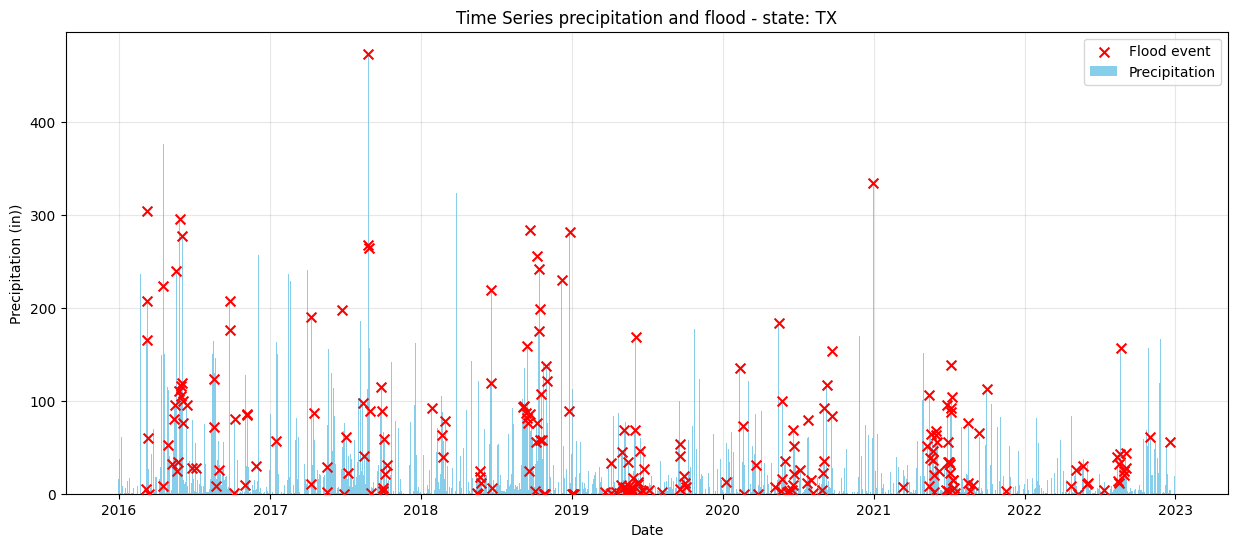

In [80]:
plot_state_series('TX')

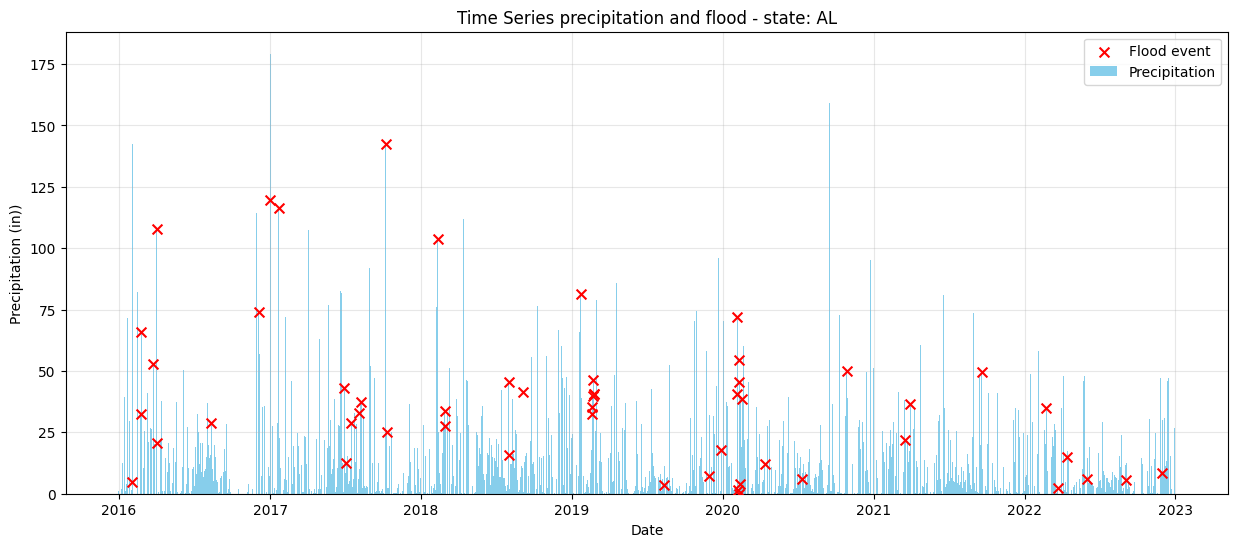

In [81]:
plot_state_series('AL')

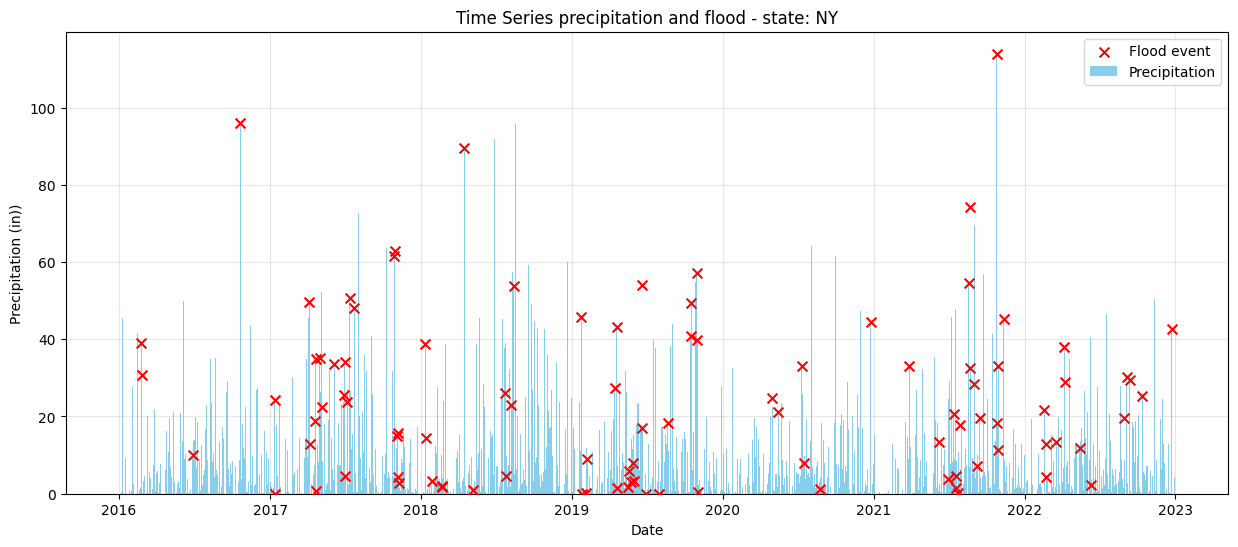

In [82]:
plot_state_series('NY')

## KDE to predict flood

In [83]:
from sklearn.neighbors import KernelDensity
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
# Configuration
STATES_TO_ANALYZE = ['TX', 'AL', 'NY']
SPLIT_RATIO = 0.8
THRESHOLD_PERCENTILE = 95


##############################
ANALYZING STATE: TX
##############################
Train samples: 2014, Test samples: 504


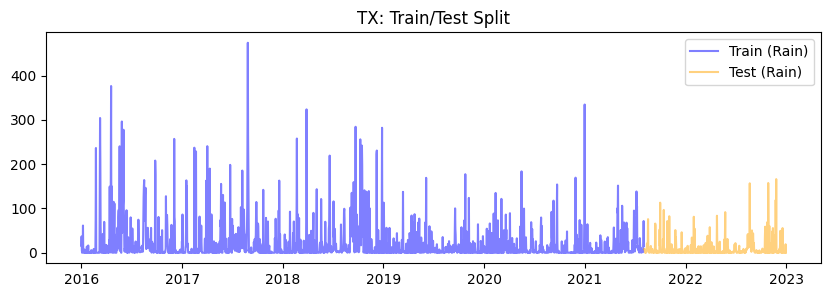

Model Bandwidth (h): 2.6796
Anomaly Threshold: 6.90 (Percentile: 95%)

Confusion Matrix (Test):
[[474   4]
 [ 24   2]]


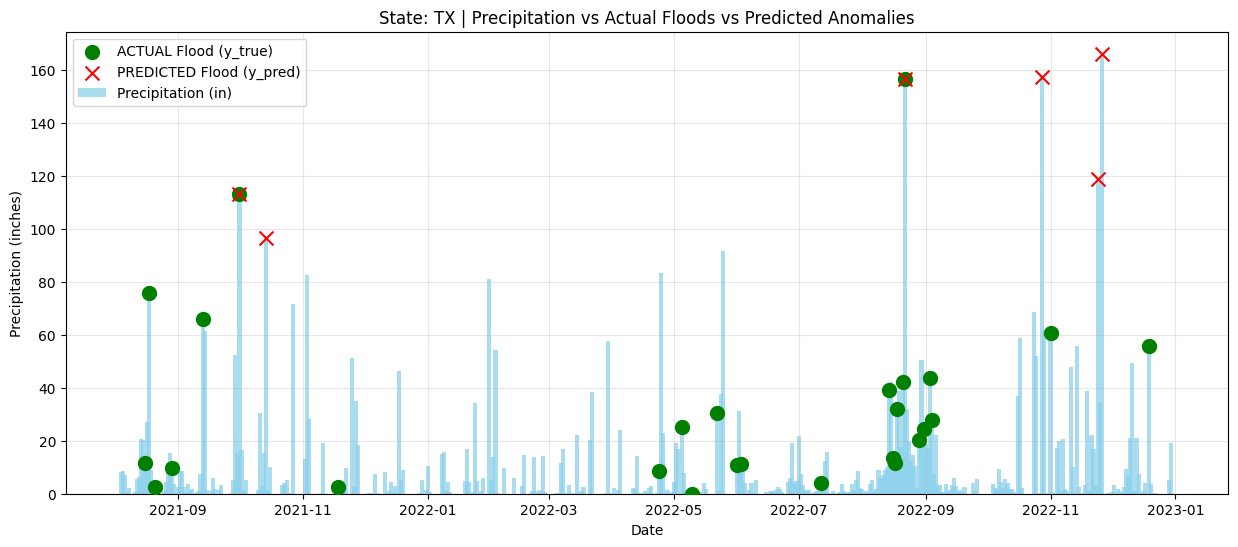


##############################
ANALYZING STATE: AL
##############################
Train samples: 1746, Test samples: 437


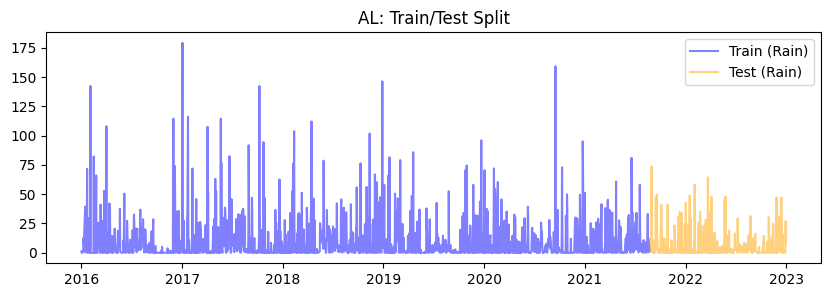

Model Bandwidth (h): 1.8528
Anomaly Threshold: 6.28 (Percentile: 95%)

Confusion Matrix (Test):
[[419  11]
 [  6   1]]


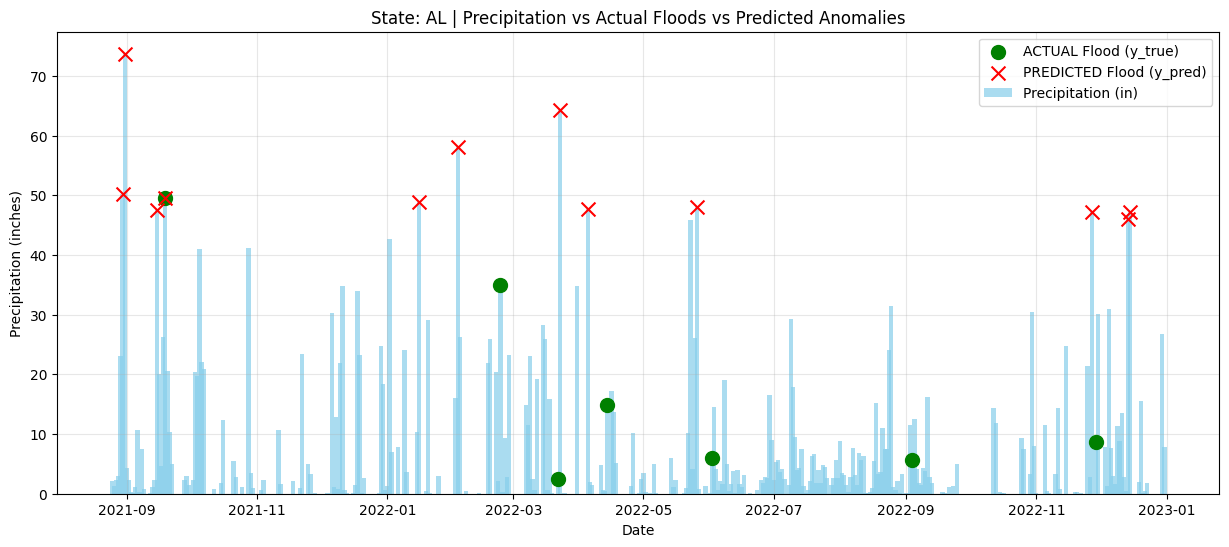


##############################
ANALYZING STATE: NY
##############################
Train samples: 1753, Test samples: 439


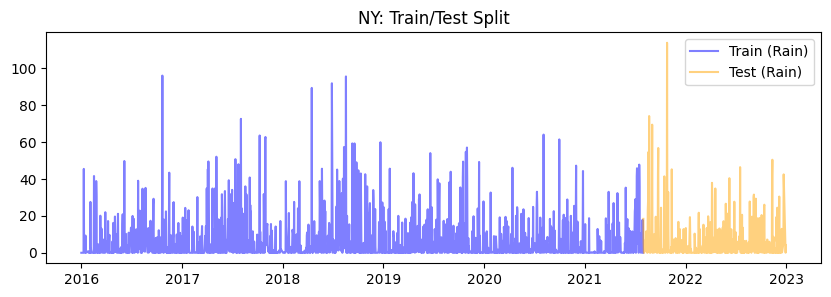

Model Bandwidth (h): 1.1988
Anomaly Threshold: 5.95 (Percentile: 95%)

Confusion Matrix (Test):
[[404  11]
 [ 15   9]]


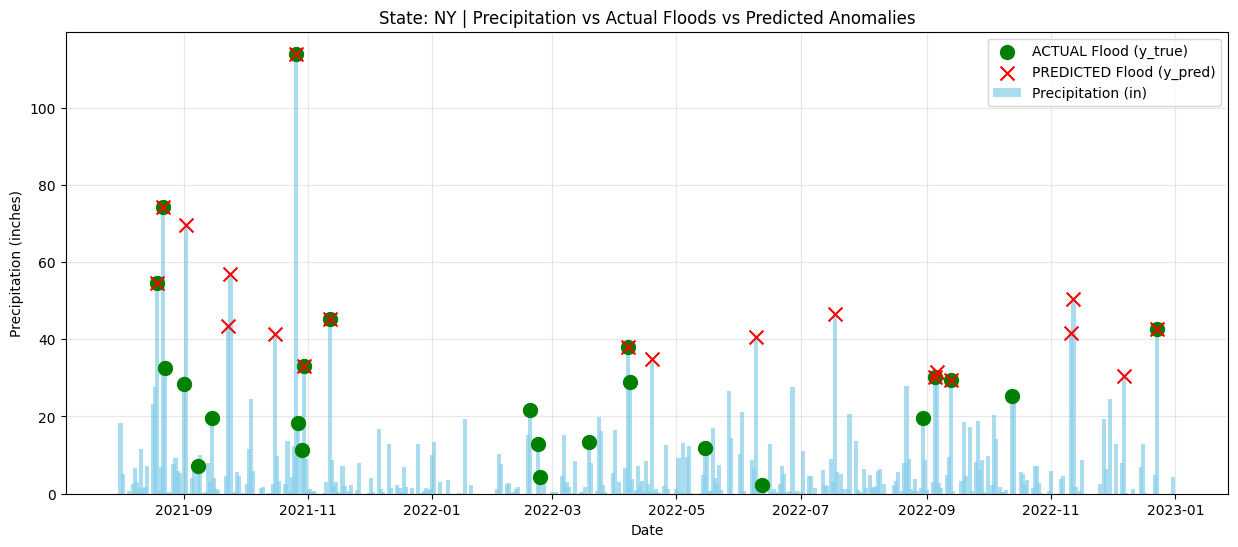

In [85]:
for state in STATES_TO_ANALYZE:
    print(f"\n{'#'*30}\nANALYZING STATE: {state}\n{'#'*30}")
    
    # 1. Filter & Sort
    data = ts_df[ts_df['state'] == state].sort_values('date').copy()
    if data.empty:
        print(f"No data for {state}")
        continue

    # 2. Temporal Split
    n_train = int(len(data) * SPLIT_RATIO)
    train_data = data.iloc[:n_train]
    test_data = data.iloc[n_train:]
    
    print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")

    # Plot of the split
    plt.figure(figsize=(10, 3))
    plt.plot(train_data['date'], train_data['precipitation'], label='Train (Rain)', color='blue', alpha=0.5)
    plt.plot(test_data['date'], test_data['precipitation'], label='Test (Rain)', color='orange', alpha=0.5)
    plt.title(f"{state}: Train/Test Split")
    plt.legend()
    plt.show()

    # 3.KDE Train
    X_train = train_data[['precipitation']].values
    X_test = test_data[['precipitation']].values
    y_test = test_data['is_flood'].values

    # --- BANDWIDTH CALCULATION
    sigma = np.std(X_train)
    q1 = np.percentile(X_train, 25)
    q3 = np.percentile(X_train, 75)
    iqr = q3 - q1
    m = len(X_train)
    
    if iqr > 0:
        h = 0.9 * min(sigma, iqr / 1.34) * (m ** -0.2)
    else:
        h = 1.06 * sigma * (m ** -0.2)
        
    if h == 0: h = 0.1 # Fallback for flat data
    
    # Fit Model
    kde = KernelDensity(kernel='gaussian', bandwidth=h)
    kde.fit(X_train)

    # 4. Predict (Inference)
    # We calculate score on TRAINING to find the threshold
    train_scores = -kde.score_samples(X_train)
    
    # Threshold based on the configured percentile
    threshold = np.percentile(train_scores, THRESHOLD_PERCENTILE)
    
    # Calculate score on TEST
    test_scores = -kde.score_samples(X_test)
    
    # Prediction: If score > threshold -> Anomaly (Flood)
    y_pred = (test_scores > threshold).astype(int)

    # 5. Metrics
    print(f"Model Bandwidth (h): {h:.4f}")
    print(f"Anomaly Threshold: {threshold:.2f} (Percentile: {THRESHOLD_PERCENTILE}%)")
    print("\nConfusion Matrix (Test):")
    print(confusion_matrix(y_test, y_pred))
    
    # 6. --- FINAL PLOT ---
    plt.figure(figsize=(15, 6))
    
    # A) Barplot of Precipitation
    plt.bar(test_data['date'], test_data['precipitation'], color='skyblue', label='Precipitation (in)', width=2, alpha=0.7)
    
    # B) True Floods (y_true) - Green Dots
    true_floods = test_data[test_data['is_flood'] == 1]
    plt.scatter(true_floods['date'], true_floods['precipitation'], 
                color='green', s=100, marker='o', label='ACTUAL Flood (y_true)', zorder=5)
    
    # C) Predicted Floods (y_pred) - Red Crosses
    pred_floods = test_data[y_pred == 1]
    plt.scatter(pred_floods['date'], pred_floods['precipitation'], 
                color='red', s=100, marker='x', label='PREDICTED Flood (y_pred)', zorder=6)
    
    plt.title(f"State: {state} | Precipitation vs Actual Floods vs Predicted Anomalies")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (inches)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Optimize the threshold

In [89]:
# Define a cost function
C_ALARM = 1
C_MISSED = 15

In [90]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2     # 20% del dataset come validation dataset


ANALYZING STATE: TX
Split: Train=1510, Val=504, Test=504
Optimizing threshold on Validation Set...
Best Threshold Found: 2.83 (Min Cost: 277)


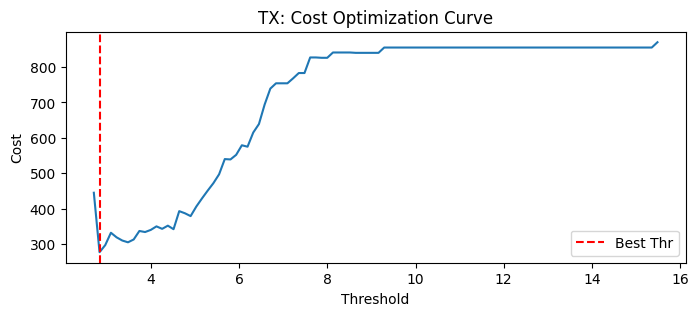


--- TEST SET RESULTS ---
[[310 168]
 [  3  23]]
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78       478
         1.0       0.12      0.88      0.21        26

    accuracy                           0.66       504
   macro avg       0.56      0.77      0.50       504
weighted avg       0.95      0.66      0.75       504



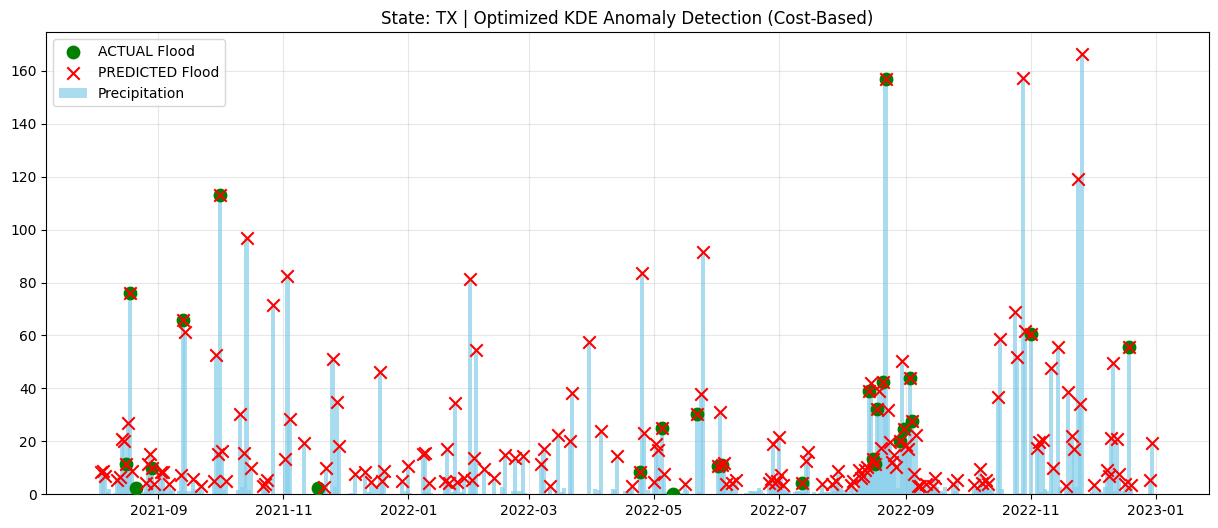


ANALYZING STATE: AL
Split: Train=1309, Val=437, Test=437
Optimizing threshold on Validation Set...
Best Threshold Found: 5.41 (Min Cost: 69)


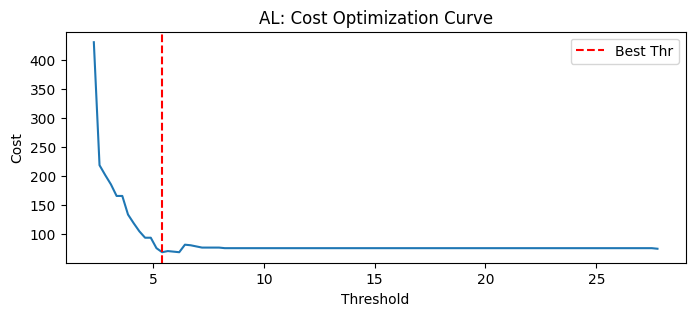


--- TEST SET RESULTS ---
[[410  20]
 [  5   2]]
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       430
         1.0       0.09      0.29      0.14         7

    accuracy                           0.94       437
   macro avg       0.54      0.62      0.55       437
weighted avg       0.97      0.94      0.96       437



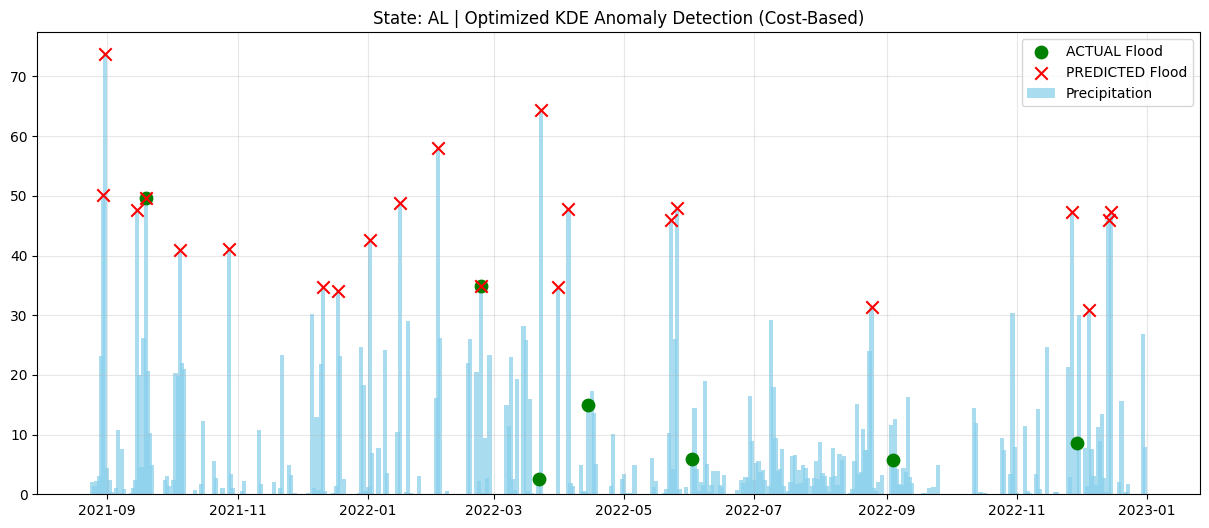


ANALYZING STATE: NY
Split: Train=1315, Val=438, Test=439
Optimizing threshold on Validation Set...
Best Threshold Found: 4.76 (Min Cost: 142)


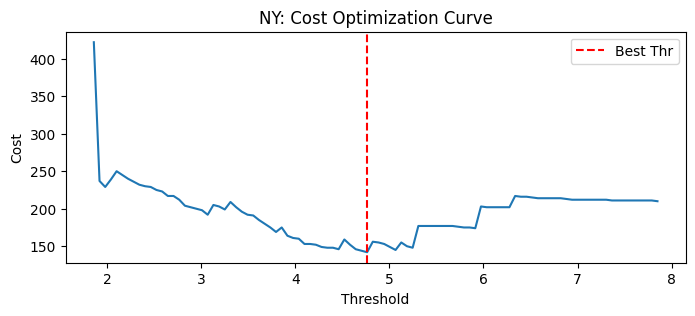


--- TEST SET RESULTS ---
[[387  28]
 [  7  17]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       415
         1.0       0.38      0.71      0.49        24

    accuracy                           0.92       439
   macro avg       0.68      0.82      0.72       439
weighted avg       0.95      0.92      0.93       439



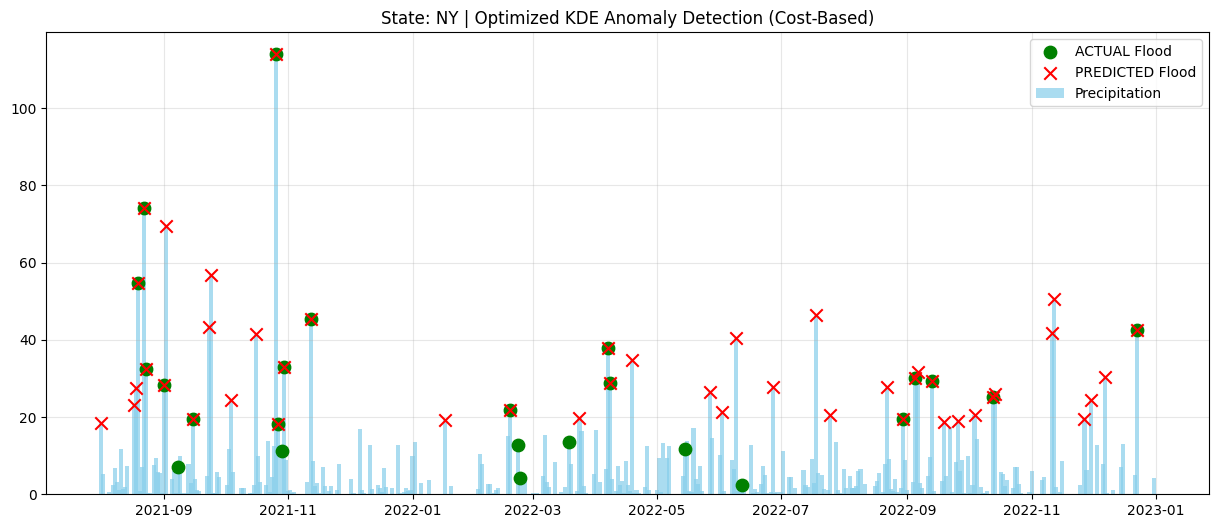

In [91]:
for state in STATES_TO_ANALYZE:
    print(f"\n{'='*60}\nANALYZING STATE: {state}\n{'='*60}")
    
    # 1. Prepare Data
    data = ts_df[ts_df['state'] == state].sort_values('date').copy()
    if data.empty: continue

    # 2. Split the dataset
    n = len(data)
    n_train = int(n * TRAIN_RATIO)
    n_val = int(n * (TRAIN_RATIO + VAL_RATIO))
    
    train_data = data.iloc[:n_train]
    val_data = data.iloc[n_train:n_val]
    test_data = data.iloc[n_val:]
    
    print(f"Split: Train={len(train_data)}, Val={len(val_data)}, Test={len(test_data)}")

    # 3. KDE TRAINING
    X_train = train_data[['precipitation']].values
    
    # Bandwidth calculation (Silverman)
    sigma = np.std(X_train)
    q1, q3 = np.percentile(X_train, [25, 75])
    iqr = q3 - q1
    h = 0.9 * min(sigma, iqr/1.34) * (len(X_train)**-0.2) if iqr > 0 else 1.06*sigma*(len(X_train)**-0.2)
    if h == 0: h = 0.1
    
    kde = KernelDensity(kernel='gaussian', bandwidth=h)
    kde.fit(X_train)

    # 4. THRESHOLD OPTIMIZATION (on the Validation Set)
    print("Optimizing threshold on Validation Set...")
    X_val = val_data[['precipitation']].values
    y_val = val_data['is_flood'].values
    
    val_scores = -kde.score_samples(X_val)
    
    possible_thresholds = np.linspace(val_scores.min(), val_scores.max(), 100)
    
    best_cost = float('inf')
    best_thr = 0
    
    # Optimization cycle for the threshold
    cost_history = []
    for thr in possible_thresholds:
        y_pred_val = (val_scores > thr).astype(int)
        
        # Cost function: (FP * C_ALARM) + (FN * C_MISSED)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val, labels=[0,1]).ravel()
        current_cost = (fp * C_ALARM) + (fn * C_MISSED)
        
        cost_history.append(current_cost)
        
        if current_cost < best_cost:
            best_cost = current_cost
            best_thr = thr
            
    print(f"Best Threshold Found: {best_thr:.2f} (Min Cost: {best_cost})")
    
    # Plot of the cost function
    plt.figure(figsize=(8, 3))
    plt.plot(possible_thresholds, cost_history)
    plt.axvline(best_thr, color='r', linestyle='--', label='Best Thr')
    plt.title(f"{state}: Cost Optimization Curve")
    plt.xlabel("Threshold")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # 5. FINAL TESTING (on the test set with opt threshold)
    X_test = test_data[['precipitation']].values
    y_test = test_data['is_flood'].values
    
    test_scores = -kde.score_samples(X_test)
    y_pred_test = (test_scores > best_thr).astype(int)
    
    # 6. REPORT
    print("\n--- TEST SET RESULTS ---")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test, zero_division=0))
    
    # 7. FINAL PLOT
    plt.figure(figsize=(15, 6))
    plt.bar(test_data['date'], test_data['precipitation'], color='skyblue', label='Precipitation', width=2, alpha=0.7)
    
    # True Floods
    true_floods = test_data[test_data['is_flood'] == 1]
    plt.scatter(true_floods['date'], true_floods['precipitation'], 
                color='green', s=80, marker='o', label='ACTUAL Flood', zorder=5)
    
    # Predicted Floods
    pred_floods = test_data[y_pred_test == 1]
    plt.scatter(pred_floods['date'], pred_floods['precipitation'], 
                color='red', s=80, marker='x', label='PREDICTED Flood', zorder=6)
    
    plt.title(f"State: {state} | Optimized KDE Anomaly Detection (Cost-Based)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()